In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive

/content/drive


In [3]:
%cd MyDrive

/content/drive/MyDrive


In [4]:
!ls

 1680916080776.jpeg		     hw_16831		       resume
'16811 - Lecture 6.pdf'		     Japan		       robomath
 1nyI98YGoz8FlssSS9DiXruOPbnXIWBKS  'kyoto photo select'       undergrad
 AdvancedCV			    'machine learning final'
'Colab Notebooks'		     paths.txt


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# **Question 1-a**

In [6]:
def divided_difference(x, f):
    # x are the known x's
    # f are the known y's
    n = len(f)
    A = np.zeros([n, n])
    # all A_0's are f
    A[:,0] = f
    for i in range(1,n):
        for k in range(n-i):
            A[k][i] = (A[k+1][i-1] - A[k][i-1])/(x[i+k]-x[k])
    return A

def interpolate(new_x, A):
    # new_x is the x at which to plot
    A = A[0]
    n = len(A)-1
    poly = A[n]
    for j in range(1, n+1):
      poly = poly*(new_x - x[n-j]) + A[n-j]
    return poly

In [7]:
"""
# Testing the code
x = np.array([0, 1, -1])
y = np.array([1, 0, 4])

to_plot = np.arange(np.min(x)-1, np.max(x)+1, .1)
A = divided_difference(x, y)
y_plot = [interpolate(item, A) for item in to_plot]

plt.figure(figsize = (8, 5))

plt.plot(to_plot, y_plot, "limegreen")
plt.plot(x, y, 'go')
"""

'\n# Testing the code\nx = np.array([0, 1, -1])\ny = np.array([1, 0, 4])\n\nto_plot = np.arange(np.min(x)-1, np.max(x)+1, .1)\nA = divided_difference(x, y)\ny_plot = [interpolate(item, A) for item in to_plot]\n\nplt.figure(figsize = (8, 5))\n\nplt.plot(to_plot, y_plot, "limegreen")\nplt.plot(x, y, \'go\')\n'

# **Question1-b**

In [8]:
x = np.array([-1/2, -1/4, 0, 1/2, 1/4])
y = np.cosh(x)
x_new = 1/5

A = divided_difference(x, y)
y_new = interpolate(x_new, A)

print("x", x)
print("y", y)
print("A", A)
print("Interpolate cosh(1/5): ", y_new)

x [-0.5  -0.25  0.    0.5   0.25]
y [1.12762597 1.0314131  1.         1.12762597 1.0314131 ]
A [[ 1.12762597 -0.38485146  0.51839812 -0.01052568  0.04210273]
 [ 1.0314131  -0.1256524   0.50787244  0.02105137  0.        ]
 [ 1.          0.25525193  0.51839812  0.          0.        ]
 [ 1.12762597  0.38485146  0.          0.          0.        ]
 [ 1.0314131   0.          0.          0.          0.        ]]
Interpolate cosh(1/5):  1.0200664914617155


# **Question1-c**

In [9]:
# function to generate known points for Question 1 c
def q1c(n):
  x = np.array([i*(2/n)-1 for i in range(n+1)])
  y = 4/(4+121*(x**2))
  return x, y

In [10]:
x, y = q1c(2)
A = divided_difference(x, y)
y_new = interpolate(0.05, A)

print("x", x)
print("y", y)
print("A", A)
print("Estimation of f(x) at x=0.05, n=2: ", y_new)

x [-1.  0.  1.]
y [0.032 1.    0.032]
A [[ 0.032  0.968 -0.968]
 [ 1.    -0.968  0.   ]
 [ 0.032  0.     0.   ]]
Estimation of f(x) at x=0.05, n=2:  0.99758


In [11]:
x, y = q1c(4)
A = divided_difference(x, y)
y_new = interpolate(0.05, A)

print("x", x)
print("y", y)
print("A", A)
print("Estimation of f(x) at x=0.05, n=4: ", y_new)

x [-1.  -0.5  0.   0.5  1. ]
y [0.032      0.11678832 1.         0.11678832 0.032     ]
A [[ 0.032       0.16957664  1.59684672 -3.41979562  3.41979562]
 [ 0.11678832  1.76642336 -3.53284672  3.41979562  0.        ]
 [ 1.         -1.76642336  1.59684672  0.          0.        ]
 [ 0.11678832 -0.16957664  0.          0.          0.        ]
 [ 0.032       0.          0.          0.          0.        ]]
Estimation of f(x) at x=0.05, n=4:  0.989051884671533


In [12]:
x, y = q1c(40)
A = divided_difference(x, y)
y_new = interpolate(0.05, A)

print("x", x)
print("y", y)
print("A", A)
print("Estimation of f(x) at x=0.05, n=40: ", y_new)

x [-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15
  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75
  0.8   0.85  0.9   0.95  1.  ]
y [0.032      0.03533491 0.03921184 0.04375291 0.04911591 0.05550737
 0.06320114 0.07256565 0.08410429 0.0985161  0.11678832 0.14033857
 0.17123288 0.21251162 0.26863667 0.34594595 0.45248869 0.59501673
 0.76775432 0.92969204 1.         0.92969204 0.76775432 0.59501673
 0.45248869 0.34594595 0.26863667 0.21251162 0.17123288 0.14033857
 0.11678832 0.0985161  0.08410429 0.07256565 0.06320114 0.05550737
 0.04911591 0.04375291 0.03921184 0.03533491 0.032     ]
A [[ 3.20000000e-02  6.66981736e-02  1.08404923e-01 ...  8.07978793e+11
  -8.81166598e+11  8.81166598e+11]
 [ 3.53349087e-02  7.75386659e-02  1.32826039e-01 ... -9.10296072e+11
   8.81166598e+11  0.00000000e+00]
 [ 3.92118420e-02  9.08212698e-02  1.64388920e-01 ...  8.07978793e+11
   0

In [13]:
f_actual = 4/(4+121*(0.05**2))
print("Actual value of f(0.05): ", f_actual)

Actual value of f(0.05):  0.9296920395119116


# **Question1-d**

n =  2 E_n =  0.6742284503961329
n =  4 E_n =  0.4568519889200251
n =  6 E_n =  0.6661072447658077
n =  8 E_n =  1.1790313522966922
n =  10 E_n =  2.266342798431067
n =  12 E_n =  4.552373039031871
n =  14 E_n =  9.39797786204935
n =  16 E_n =  19.76669100592222
n =  18 E_n =  42.14165168940854
n =  20 E_n =  90.82676890215886
n =  40 E_n =  262578.231687619


Text(0.5, 1.0, 'Maximum interpolation error')

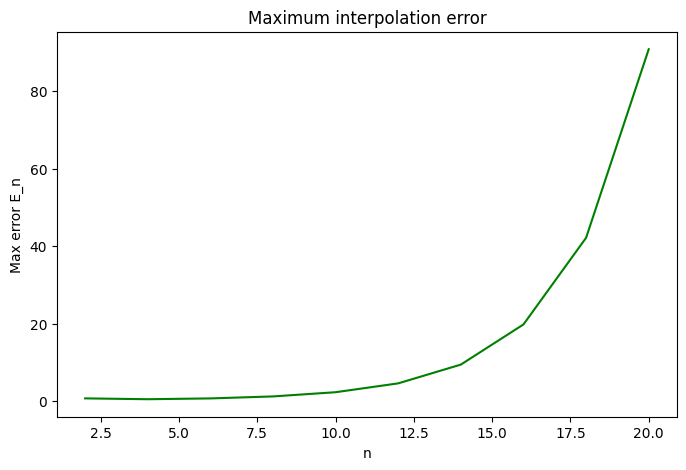

In [14]:
# descretize the interval [-1, 1] much finer than n (1000 discrete points)
x_test = np.array(np.arange(-1, 1.0001, 0.001))
# real f values at the points above
y_real = 4/(4+121*(x_test**2))
# the n values to test out
n_vals = np.arange(2, 21, 2).tolist()
n_vals.append(40)
# record the max errors
max_errs = []

# estimate the maximum interpolation error for n = 2, 4, ..., 20, and 40
for n in n_vals:
  # generate known points for n = 2, 4, 6, ..., 20
  x, y = q1c(n)
  A = divided_difference(x, y)
  # interpolate the discrete points
  y_test = np.array([interpolate(item, A) for item in x_test])
  errs = np.absolute(y_real - y_test)
  max_errs.append(max(errs))

# Max error results
for i in range(len(n_vals)):
  print("n = ", n_vals[i], "E_n = ", max_errs[i])
plt.figure(figsize = (8, 5))
plt.xlabel("n")
plt.ylabel("Max error E_n")
plt.plot(np.arange(2, 21, 2), max_errs[:-1], "g")
plt.title("Maximum interpolation error")

Text(0.5, 1.0, 'n=40 interpolation')

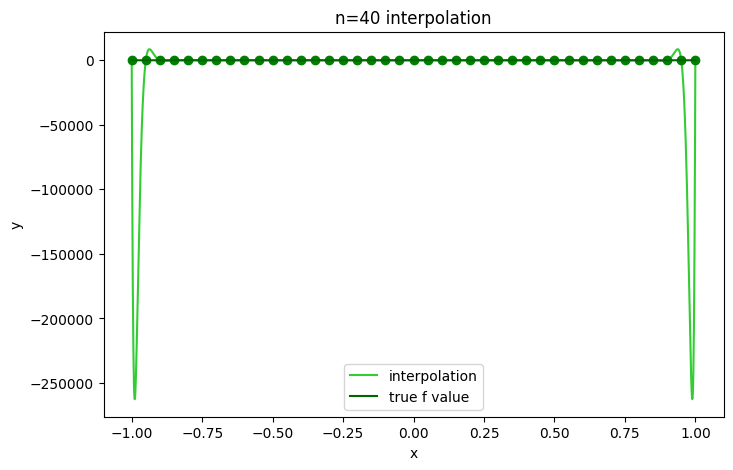

In [15]:
# Testing the code
plt.figure(figsize = (8, 5))
plt.plot(x_test, y_test, "limegreen", label = "interpolation")
plt.plot(x, y, 'go')
plt.plot(x_test, y_real, "darkgreen", label = "true f value")
plt.xlabel("x")
plt.ylabel("y")
leg = plt.legend(loc='lower center')
plt.title(str("n=" + str(n_vals[-1])) + " interpolation")

In [16]:
"""
For higher order interpolation polynomials, the results make sense.
The Faber's Theorem tells us that for every interpolating array there exists a continuous function g:[a. b] --> R
and there exists a point x in (a, ) such that Pn(g)(x) does not converge to g(x) as n --> infinity.

In other words, for any preset interpolating scheme, there is some continuous function as which the scheme fails to produce good convergence.

Often this failure of convergence is very apparent with uniformly spaced interpolating points

Therefore, we should be wary of higher order interpolating polynomials and we certainly should not put much faith in extrapolation.
"""

"\nFor higher order interpolation polynomials, the results make sense.\nThe Faber's Theorem tells us that for every interpolating array there exists a continuous function g:[a. b] --> R\nand there exists a point x in (a, ) such that Pn(g)(x) does not converge to g(x) as n --> infinity.\n\nIn other words, for any preset interpolating scheme, there is some continuous function as which the scheme fails to produce good convergence.\n\nOften this failure of convergence is very apparent with uniformly spaced interpolating points\n\nTherefore, we should be wary of higher order interpolating polynomials and we certainly should not put much faith in extrapolation.\n"

# **Question 3**


In [17]:
import mpmath
import numpy as np

def Newtons_nethod(f, df, z, thresh, iter_max):
  # f: original function which we want to find root
  # df: derivative of f
  # z: initial guess
  # thresh: threshold for detecting convergence
  # iter_max: maximum iteration
  res = z
  iter = 0
  while iter < iter_max:
    f_res = f(res)
    df_res = df(res)
    # if initial guess is good enough, return
    if np.absolute(f_res) <= thresh:
      return float(res)
    elif df_res == 0:
      # zero division error from df == 0
      return False
    else:
      # iterative method
      res = res - (f_res/df_res)
    iter += 1
  return False

# x = tan(x) --> f(x) = tan(x) - x = 0
f_test = lambda x: mpmath.tan(x) - x
df_test = lambda x: (mpmath.sec(x))**2 - 1
thresh_test = 0.0001
iter_max_test = 1000
zs = np.arange(95, 105, 0.05)
results = []
# find root on either side of this number
num = 100
for z_test in zs:
  res_test = Newtons_nethod(f_test, df_test, z_test, thresh_test, iter_max_test)
  results.append(res_test)
results = [j for j in results if j != False]
results.sort()
print("Roots found: ", results)

# get the low and high roots
low = min(results)
high = max(results)
for item in results:
  if item > num and item < high:
    high = item
  elif item < num and item > low:
    low = item
print("solutions on either side of " + str(num) + ": ")
print("low root: ", low)
print("high root: ", high)

Roots found:  [95.80813878814617, 98.95006282434697, 102.09196646490774, 108.37571965204596, 133.51019785553368, 290.59387924241156]
solutions on either side of 100: 
low root:  98.95006282434697
high root:  102.09196646490774


# **Question 5**

In [18]:
import math
import numpy as np
import copy

def muller_method(x0, x1, x2, iter_max, thresh):
  roots = []
  iter = 0
  while iter < iter_max:
    h0 = x1 - x0
    h1 = x2 - x1
    f_x0 = f(x0, roots_found)
    f_x1 = f(x1, roots_found)
    f_x2 = f(x2, roots_found)
    d0 = (f_x1 - f_x0) / h0
    d1 = (f_x2 - f_x1) / h1

    a = (d1 - d0) / (h1 + h0)
    b = a*h1 + d1
    c = f_x2

    val = b**2 - 4*a*c
    if val < 0:
      desc = np.sqrt(val + 0j)
    else:
      desc = np.sqrt(val)

    # sign agrees with that of b
    # so we get largest denominator
    if b < 0:
      de = b - desc
    else:
      de = b + desc

    x3 = x2 + (-2*c) / de
    err = np.absolute((x3-x2)/x3)

    # if converges save this root
    if err < thresh:
      if np.iscomplex(x3):
        if np.abs(np.imag(x3)) < 0.0000001:
          x3 = np.real(x3)
        else:
          roots.append(np.conjugate(x3))
      roots.append(x3)
      return roots

    # otherwise keep finding
    x0 = copy.deepcopy(x1)
    x1 = copy.deepcopy(x2)
    x2 = copy.deepcopy(x3)
    iter += 1

  return False

def f(x, lst):
  res = x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1
  if len(lst) == 0:
    return res
  else:
    to_divide = 1
    for item in lst:
      to_divide *= (x - item)
    return res / to_divide

iter_max_test = 100

# this is initial x1
initial_x = 0
shift = 1

thresh_test = 0.00001

degrees = 7
roots_found = []

while len(roots_found) < degrees:
  res = muller_method(initial_x - shift, initial_x, initial_x + shift, iter_max_test, thresh_test)
  if res != False:
    roots_found.extend(res)
    initial_x = initial_x + shift


print("roots found", roots_found)


roots found [(-0.7071067811864944+0.7071067811854436j), (-0.7071067811864944-0.7071067811854436j), (0.7071067811864156+0.7071067811865268j), (0.7071067811864156-0.7071067811865268j), (-5.5554820990926645e-18-1j), (-5.5554820990926645e-18+1j), -1.0]


## **Question 6-a**

In [19]:
import numpy as np

# take the coefficients
def resultants_root(c1, c2, thresh):
  dim = len(c1) - 1 + len(c2) - 1
  Q = np.zeros((dim, dim))

  for i in range(len(c1)-1):
    Q[i, i:i+len(c1)] = c1
  for j in range(len(c2)-1):
    Q[len(c1) - 1 + j, j:j+len(c2)] = c2
  print("matrix Q")
  print(Q)

  det = np.linalg.det(Q)
  print("Q's determinant is ", det)

  # if common root exists, use the ration method
  if np.absolute(det) < thresh:
    print("We consider Q has a determinant of zero")
    Q = np.array(Q[:-1])
    q1 = Q[:, 1:]
    columns = np.array([i for i in range(Q.shape[1]) if i != 1], dtype=np.intp)
    q2 = Q[:, columns]
    print("q1", q1, "q2", q2, sep = "\n")

    r = -1 * ((np.linalg.det(q1)) / (np.linalg.det(q2)))
    print("Obtain the root by dividing det(q1) / det(q2) gives: ", r)
    return r

if __name__ == "__main__":
  c1 = [1, -2, 1, -2]
  c2 = [1, -1, -4, 4]
  thresh = 0.0001
  r = resultants_root(c1, c2, thresh)
  print("The common root is ", r)


matrix Q
[[ 1. -2.  1. -2.  0.  0.]
 [ 0.  1. -2.  1. -2.  0.]
 [ 0.  0.  1. -2.  1. -2.]
 [ 1. -1. -4.  4.  0.  0.]
 [ 0.  1. -1. -4.  4.  0.]
 [ 0.  0.  1. -1. -4.  4.]]
Q's determinant is  -2.2204460492503077e-14
We consider Q has a determinant of zero
q1
[[-2.  1. -2.  0.  0.]
 [ 1. -2.  1. -2.  0.]
 [ 0.  1. -2.  1. -2.]
 [-1. -4.  4.  0.  0.]
 [ 1. -1. -4.  4.  0.]]
q2
[[ 1.  1. -2.  0.  0.]
 [ 0. -2.  1. -2.  0.]
 [ 0.  1. -2.  1. -2.]
 [ 1. -4.  4.  0.  0.]
 [ 0. -1. -4.  4.  0.]]
Obtain the root by dividing det(q1) / det(q2) gives:  2.000000000000002
The common root is  2.000000000000002


## **Question 6-b**

## **Question 8**

[[0.5, 0.775991, 1.04706, 1.28025, 1.46318, 1.59615, 1.68104, 1.72958, 1.79171, 1.89703, 2.04829, 2.23335, 2.4346, 2.62755, 2.79774, 2.95514, 3.10586, 3.27453, 3.47152, 3.68953, 3.91674, 4.14224, 4.36216, 4.57091, 4.76974, 4.96178, 5.14864, 5.33423, 5.51969, 5.70478, 5.88876, 6.07065, 6.24952, 6.42469, 6.59533, 6.76068, 6.92009, 7.07278, 7.21801, 7.35477, 7.4821, 7.59905, 7.70518, 7.79888, 7.8783, 7.94157, 7.98825, 8.01583, 8.02108, 8.0], [0.5, 0.774552, 1.07991, 1.40581, 1.74169, 2.07912, 2.41442, 2.74424, 3.08704, 3.45325, 3.8469, 4.27956, 4.75717, 5.27592, 5.82175, 6.35958, 6.86515, 7.32741, 7.74217, 8.12172, 8.47196, 8.79413, 9.08687, 9.35221, 9.59052, 9.80378, 9.9922, 10.1537, 10.2877, 10.3958, 10.4794, 10.5395, 10.5771, 10.5933, 10.5886, 10.5636, 10.5187, 10.4541, 10.37, 10.2664, 10.1428, 9.99879, 9.83382, 9.64698, 9.43742, 9.20433, 8.94531, 8.65914, 8.3444, 8.0], [0.75, 1.00113, 1.20084, 1.34892, 1.44704, 1.49705, 1.52017, 1.57575, 1.67615, 1.81393, 1.97863, 2.16365, 2.34803, 2.

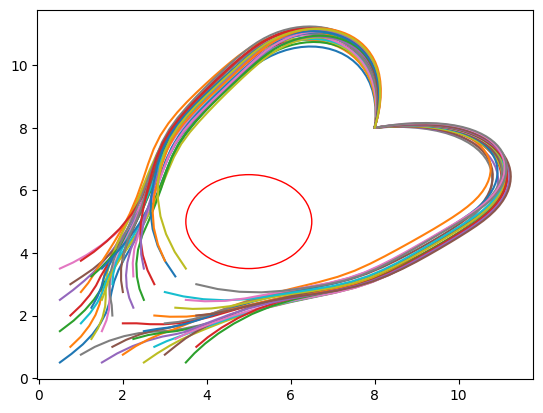

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# this block of code reads paths data
f = open("paths.txt", "r" )
path_arr = []
for line in f:
  line = line.rstrip('\n')
  row = line.split()
  row_num = [float(item) for item in row]
  path_arr.append(row_num)
f.close()
print(path_arr)

fig, ax = plt.subplots()
for i in range(0, len(path_arr), 2):
  plt.plot(np.array(path_arr[i]), np.array(path_arr[i+1]))
circle1 = plt.Circle( (5, 5 ),1.5 ,fill = False, color = "r" )
ax.add_patch(circle1)
plt.show()

In [48]:
##### This block defines all the functions

# split paths into upper and lower
def split_up_low(paths, c, d):
  paths = np.array(paths)
  # return: the indices of up and low paths
  u_idx = []
  l_idx = []
  # expression of the line that splits upper and lower y = k*x + b
  x1, x2, y1, y2 = c[0], d[0], c[1], d[1]
  k = (y1-y2)/(x1-x2)
  b = y1 - x1*k

  for i in range(0, len(paths), 2):
    path_xs = paths[i]
    path_ys = paths[i+1]
    line_ys = k*path_xs + b
    dists = path_ys - line_ys
    if np.average(dists) > 0:
      u_idx.append(i)
    else:
      l_idx.append(i)
  return u_idx, l_idx

# decide from p0 whether to take upper or lower paths
def decide_up_low(p0, up0s, lp0s):
  udist = np.average(np.linalg.norm(p0 - up0s, axis=1))
  ldist = np.average(np.linalg.norm(p0 - lp0s, axis=1))
  # 1 means the p0 belongs to upper paths
  if udist < ldist:
    return 1
  else:
    return 0

# choose initial three points
def choose_initial_points(p0, p0s):
  # compute the distances between p0 and other starting points
  ds = np.linalg.norm(p0 - p0s, axis=1)
  close_p0_idx = np.argsort(ds, axis=0)

  # first locate the 2 points closest to p0
  pi = p0s[close_p0_idx[0]]
  pj = p0s[close_p0_idx[1]]
  k = 2

  # look for a 3rd point that forms a triangle with the first 2
  # iterate until p0 falls in a triangle formed by 3 initial points
  while k < len(p0s):
    pk = p0s[close_p0_idx[k]]
    # the initial weights fpr Barymetric coordinates
    A = np.matrix([[pi[0], pj[0], pk[0]], [pi[1], pj[1], pk[1]], [1.0, 1.0, 1.0]])
    b = np.array([p0[0], p0[1], 1.0])
    weights = np.linalg.solve(A, b)

    if (np.all(weights> 0.0)) and np.absolute(np.sum(weights)-1) <= 0.000001:
      return np.array([close_p0_idx[0], close_p0_idx[1], close_p0_idx[k]]), weights
    k += 1
  return False

# compute new path from w: initial weights and ps: 3 chosen paths
def compute_new_path(w, ps):
  #w = np.array(w)[0]
  new_path = np.zeros((2, ps.shape[1]))
  for i in range(len(w)):
    new_path[0] += w[i] * ps[i*2]
    new_path[1] += w[i] * ps[i*2+1]
  return new_path

#######  The complete process of creating a new path   #######
def create_new_path(p0, u_paths, l_paths, interpolation = False):
  l_p0s = l_paths[:, 0].reshape(int(len(l_paths)/2), 2)
  u_p0s = u_paths[:, 0].reshape(int(len(u_paths)/2), 2)
  path_choice = decide_up_low(p0, u_p0s, l_p0s)

  # choose upper or lower path for p0
  if path_choice == 1:
    my_paths = u_paths
  else:
    my_paths = l_paths
  my_p0s = my_paths[:, 0].reshape(int(len(my_paths)/2), 2)

  # choose inital 3 p0's to determine the 3 paths
  init_p0_idx, init_weights = choose_initial_points(p0, my_p0s)
  init_p0s = my_p0s[init_p0_idx]

  # the 3 corresponding chosen paths
  chosen_paths_idx = []
  for idx in init_p0_idx:
    chosen_paths_idx.append(2*idx)
    chosen_paths_idx.append(2*idx+1)
  chosen_paths = my_paths[np.array(chosen_paths_idx)]

  # compute the new path
  new_path = compute_new_path(init_weights, chosen_paths)

  # plot the results
  fig, ax = plt.subplots(figsize = (8, 8))
  plt.xlim(0, 12)
  plt.ylim(0, 12)
  ax = plt.gca()
  ax.set_aspect('equal', adjustable='box')
  plt.text(p0[0], p0[1], '({}, {})'.format(p0[0], p0[1]))
  plt.plot(init_p0s[:, 0], init_p0s[:, 1], 'o', color = 'orange')
  for i in range(0, len(chosen_paths), 2):
    plt.plot(chosen_paths[i], chosen_paths[i+1], color = 'orange', label = "chosen paths" if i == 0 else None)
  plt.plot(new_path[0], new_path[1], 'o', color = 'lightgreen', label="new path")
  plt.plot(p0[0], p0[1], 'o', color = 'red', label = "p0")
  circle1 = plt.Circle( (5, 5 ),1.5 ,fill = False, color = "r" )
  ax.add_patch(circle1)

  # if we want to interpolate as well, with continuous t
  # approximated with finely chosen points
  if interpolation == True:
    t_arr = np.arange(0, new_path.shape[1], 0.01)
    xt_arr, pt_arr = interpolate(t_arr, new_path)
    plt.plot(xt_arr, pt_arr, color = "green", label = "interpolation")
    plt.legend( loc ="lower right")
    plt.show()
    return new_path, xt_arr, pt_arr

  plt.legend( loc ="lower right")
  plt.show()
  return new_path

# interpolation for one t value
def interpolate_step(t, path):
  # time scale for t is 1
  if t >= path.shape[1]-1:
    return path[0][-1], path[1][-1]
  elif t < 0:
    return path[0][0], path[1][0]
  else:
    # interpolate linearly between each points
    # floor and ceiling of t
    t_fl = int(t)
    t_cl = int(t) + 1
    x1, x2, y1, y2 = path[0][t_fl], path[0][t_cl], path[1][t_fl], path[1][t_cl]
    k = (y1-y2) / (x1-x2)
    b = y1 - x1*k
    # as (xt - x1)/(x2 - x1) = (t - t_fl)/(t_cl - t_fl) = (t - t_fl)/1, we have
    xt = x1 + (t - t_fl)*(x2 - x1)
    pt = k*xt + b
  return xt, pt

# interpolation for all t's
def interpolate(t_arr, path):
  pt_arr = []
  xt_arr = []
  for t in t_arr:
    res = interpolate_step(t, path)
    pt_arr.append(res[1])
    xt_arr.append(res[0])
  pt_arr = np.array(pt_arr)
  xt_arr = np.array(xt_arr)
  return xt_arr, pt_arr

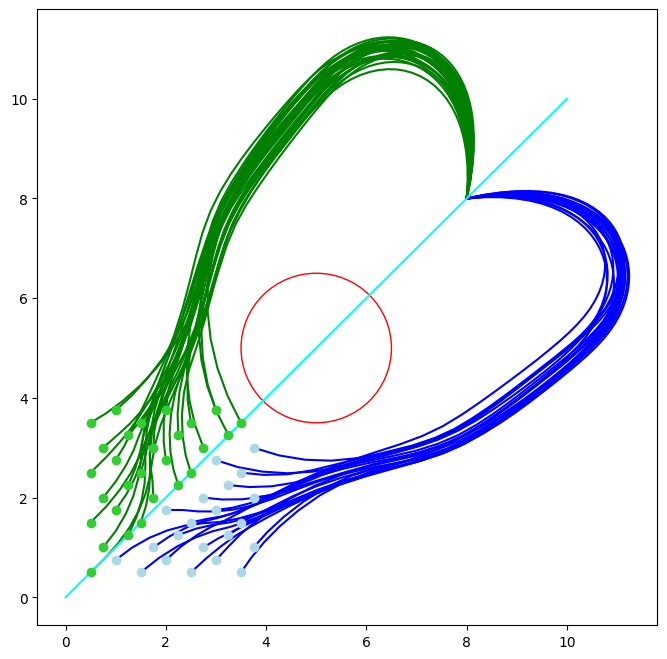

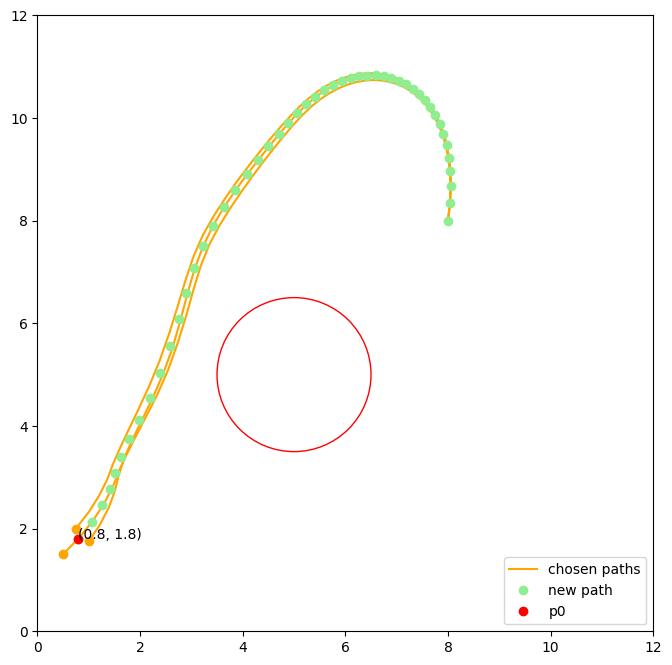

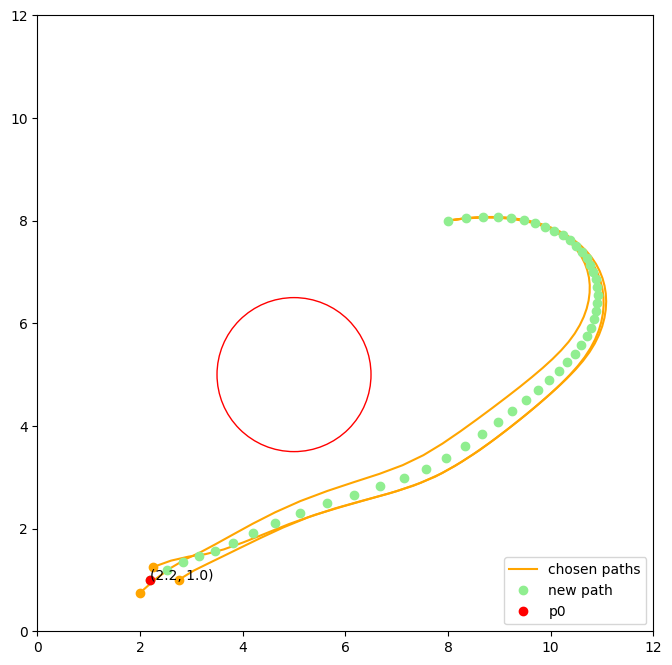

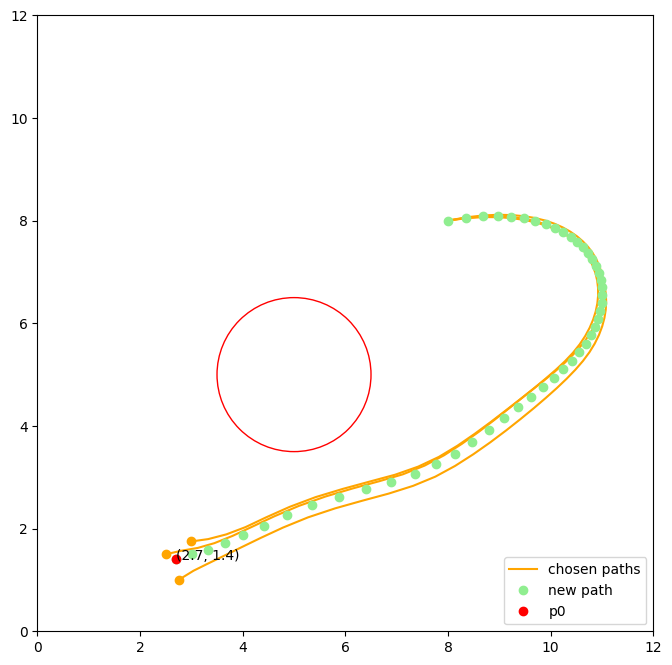

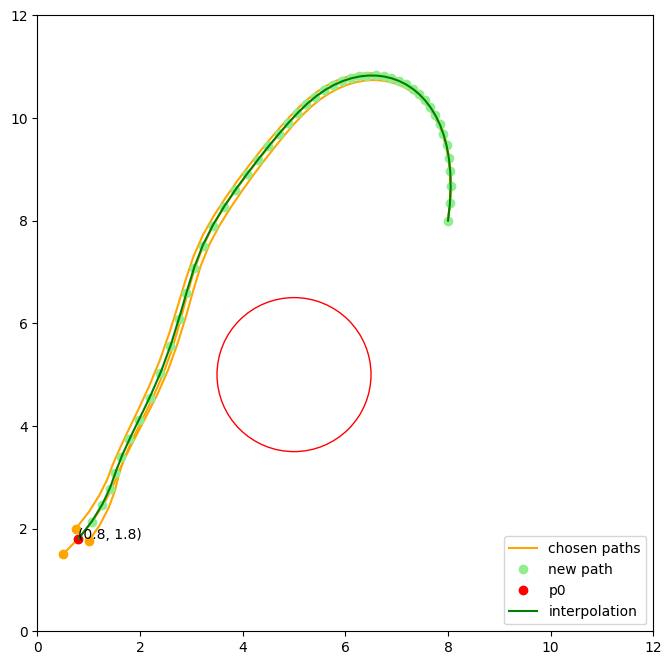

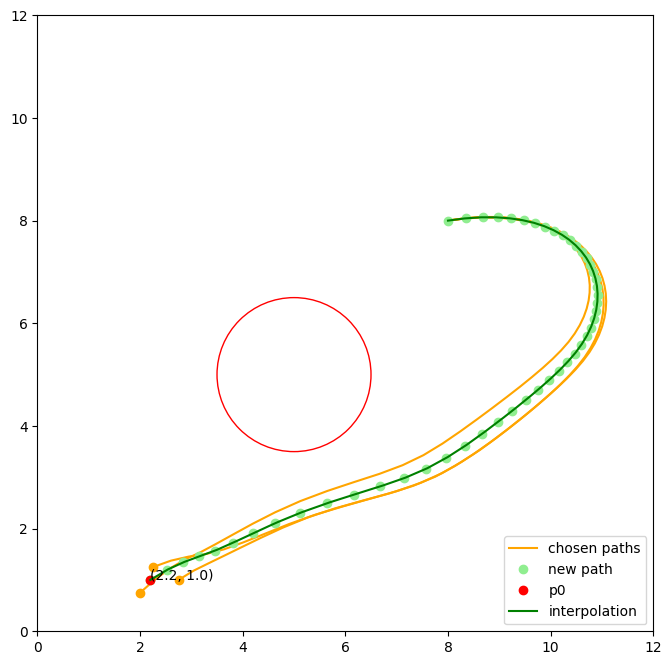

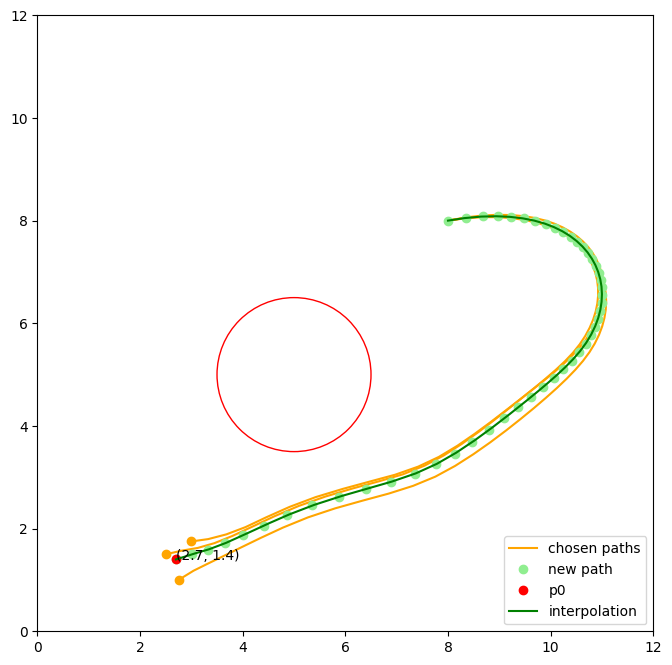

In [49]:
if __name__ == "__main__":
  ##### STEP 0: initialize

  circle_c = np.array([5, 5])
  dest = np.array([8, 8])

  uidx, lidx = split_up_low(path_arr, circle_c, dest)

  # upper and lower paths
  u_paths = []
  l_paths = []

  for i in uidx:
    u_paths.append(path_arr[i])
    u_paths.append(path_arr[i+1])

  for j in lidx:
    l_paths.append(path_arr[j])
    l_paths.append(path_arr[j+1])

  ##### STEP 1: split paths into upper and lower

  # arrays of the upper and lower paths
  u_paths, l_paths = np.array(u_paths), np.array(l_paths)

  # plot upper and lower paths
  fig, ax = plt.subplots(figsize=(8, 8))

  for i in range(0, len(u_paths), 2):
    plt.plot(u_paths[i], u_paths[i+1], color = "green")
  for i in range(0, len(l_paths), 2):
    plt.plot(l_paths[i], l_paths[i+1], color = "blue")
  circle1 = plt.Circle( (5, 5 ),1.5 ,fill = False, color = "r" )
  plt.plot(np.array([0, 10]), np.array([0, 10]), color = "cyan")
  ax.add_patch(circle1)

  # starting points of the paths
  l_p0s = l_paths[:, 0].reshape(int(len(l_paths)/2), 2)
  u_p0s = u_paths[:, 0].reshape(int(len(u_paths)/2), 2)
  plt.plot(l_p0s[:, 0], l_p0s[:, 1], 'o', color="lightblue")
  plt.plot(u_p0s[:, 0], u_p0s[:, 1], 'o', color="limegreen")
  plt.show()

  ##### STEP 2: calculate weights for each step

  # the starting point
  p0_arr = [np.array([0.8, 1.8]), np.array([2.2, 1.0]), np.array([2.7, 1.4])]
  new_path1 = create_new_path(p0_arr[0], u_paths, l_paths)
  new_path2 = create_new_path(p0_arr[1], u_paths, l_paths)
  new_path3 = create_new_path(p0_arr[2], u_paths, l_paths)


  ##### STEP 3: interpolate for continuous t

  # here pt_arr's are the interpolated p(t) values
  new_path1, xt_arr1, pt_arr1 = create_new_path(p0_arr[0], u_paths, l_paths, interpolation = True)
  new_path2, xt_arr2, pt_arr2 = create_new_path(p0_arr[1], u_paths, l_paths, interpolation = True)
  new_path3, xt_arr3, pt_arr3 = create_new_path(p0_arr[2], u_paths, l_paths, interpolation = True)